In [1]:
import optuna
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('/opt/ml/code/src/')

from utils import seed_everything, roc_auc_score
from model import cat
from features import feature_engineering

SEED = 42  # 랜덤 시드
seed_everything(SEED)  # 시드 고정

In [2]:
# 데이터 파일 읽기
data = pd.read_csv("/opt/ml/code/input/train.csv", parse_dates=["order_date"])

# 피처 엔지니어링 실행
train, test, y, features = feature_engineering(data, '2011-12')

categorical feature: ['year_month-mode']
train_set.shape (5722, 144) , test_set.shape (5914, 144)


In [26]:
def objective(trial):
    cat_params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 100000), # 트리 개수
        'learning_rate': 0.08830125824602941,
        'depth': 7,
        'rsm': 0.6605325430897941,
        'boosting_type': 'Ordered',
        'bootstrap_type': 'MVS'
    }
    
    # oof prediction 함수 호출해서 out of fold validation 예측값을 얻어옴
    y_oof, test_preds = cat(train, y, test, features, cat_params, WANDB_USE=False)
    
    # Validation 스코어 계산
    val_auc = roc_auc_score(y, y_oof)
    
    return val_auc

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100)

1	test: 0.6845250	best: 0.3930343 (42)	total: 10m 18s	remaining: 34m 9s
17856:	learn: 0.0559708	test: 0.6845721	best: 0.3930343 (42)	total: 10m 18s	remaining: 34m 9s
17857:	learn: 0.0559708	test: 0.6845733	best: 0.3930343 (42)	total: 10m 18s	remaining: 34m 9s
17858:	learn: 0.0559708	test: 0.6845766	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17859:	learn: 0.0559708	test: 0.6845769	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17860:	learn: 0.0559708	test: 0.6845775	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17861:	learn: 0.0559708	test: 0.6845776	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17862:	learn: 0.0559707	test: 0.6845770	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17863:	learn: 0.0559707	test: 0.6845755	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17864:	learn: 0.0559563	test: 0.6847042	best: 0.3930343 (42)	total: 10m 19s	remaining: 34m 9s
17865:	learn: 0.0559563	test: 0.6847047	best: 0.3930343 (42)	total: 10m 19s	remain

KeyboardInterrupt: 

In [15]:
study.best_value

0.8249658584076317

In [16]:
study.best_params

{'learning_rate': 0.08830125824602941,
 'depth': 7,
 'rsm': 0.6605325430897941,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'MVS'}

In [17]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  0.730381 2021-04-21 17:59:58.109172 2021-04-21 18:03:34.256605   
1        1  0.823838 2021-04-21 18:03:34.258083 2021-04-21 18:05:34.668410   
2        2  0.792197 2021-04-21 18:05:34.669539 2021-04-21 18:13:37.472643   
3        3  0.741734 2021-04-21 18:13:37.473794 2021-04-21 18:14:35.183537   
4        4  0.738379 2021-04-21 18:14:35.184689 2021-04-21 18:32:02.324086   
..     ...       ...                        ...                        ...   
95      95  0.824966 2021-04-21 21:47:46.771255 2021-04-21 21:48:57.755611   
96      96  0.813247 2021-04-21 21:48:57.757162 2021-04-21 21:56:12.780122   
97      97  0.820389 2021-04-21 21:56:12.781358 2021-04-21 21:57:23.817803   
98      98  0.790588 2021-04-21 21:57:23.819279 2021-04-21 21:57:59.265578   
99      99  0.796640 2021-04-21 21:57:59.267221 2021-04-21 21:59:53.850209   

                 duration params_boosting_type params_bootstrap_type  \
0  0 days 00:03:36.147433              Ordered              Bayesian   
1  0 days 00:02:00.410327              Ordered                   MVS   
2  0 days 00:08:02.803104              Ordered                   MVS   
3  0 days 00:00:57.709743                Plain             Bernoulli   
4  0 days 00:17:27.139397              Ordered                   MVS   
..                    ...                  ...                   ...   
95 0 days 00:01:10.984356              Ordered                   MVS   
96 0 days 00:07:15.022960              Ordered                   MVS   
97 0 days 00:01:11.036445              Ordered                   MVS   
98 0 days 00:00:35.446299                Plain              Bayesian   
99 0 days 00:01:54.582988              Ordered             Bernoulli   

    params_depth  params_learning_rate  params_rsm     state  
0              7              0.002543    0.874910  COMPLETE  
1              8              0.062716    0.540190  COMPLETE  
2              9              0.024639    0.754328  COMPLETE  
3             10              0.000157    0.551735  COMPLETE  
4              9              0.004037    0.722106  COMPLETE  
..           ...                   ...         ...       ...  
95             7              0.088301    0.660533  COMPLETE  
96             9              0.038600    0.711881  COMPLETE  
97             7              0.066254    0.633319  COMPLETE  
98             8              0.168057    0.696008  COMPLETE  
99             6              0.055905    0.735461  COMPLETE  

[100 rows x 11 columns]

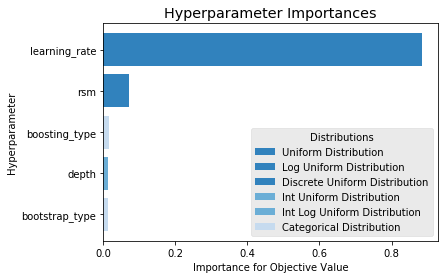

In [18]:
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

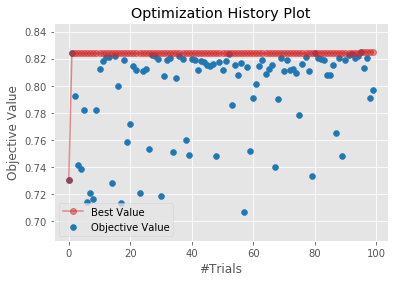

In [19]:
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

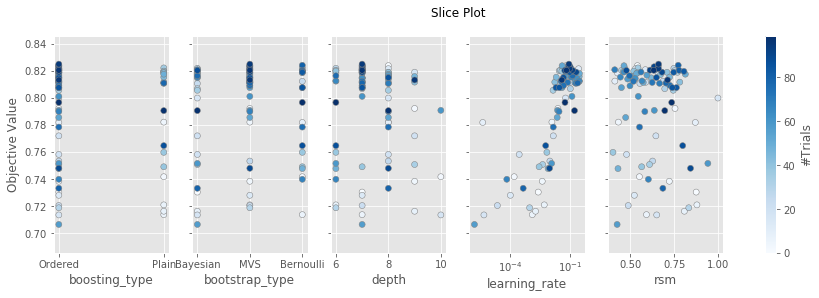

In [20]:
optuna.visualization.matplotlib.plot_slice(study)
plt.show()

[W 2021-04-21 22:16:21,305] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


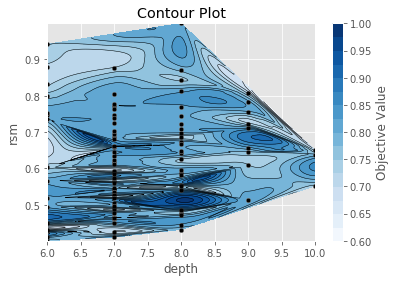

In [24]:
optuna.visualization.matplotlib.plot_contour(study, params=['depth','rsm'])
plt.show()

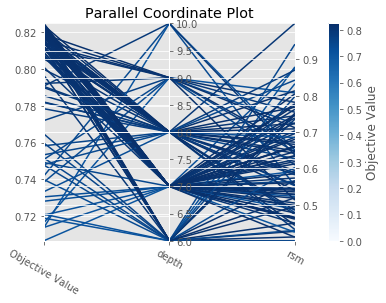

In [25]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study, params=['depth','rsm'])
plt.show()